In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random

In [ ]:
# df_train = pd.read_csv('/content/train Zoom.csv')
df_train = pd.read_csv('/content/train Zoom.csv')
df_train

,text,reason,label
0,this is an amazing app for online classes!but,good app for conducting online classes,1
1,very practical and easy to use,app is user-friendly,1
2,this app is very good for video conferencing.,good for video conferencing,1
3,i can not download this zoom app,unable to download zoom app,1
4,i am not able to download this app,want to download the app,1
...,...,...,...
4116,i am not getting jio tv properly.,want compatibility with more smart televisions,0
4117,(learn from the netflix interface),unable to use with jio tv,0
4118,"hello,\ndisney+ must also be installed on chro...",netflix ui is better,0
4119,it is a shame that disney+ does not work on tv...,unable to use disney on chromecast,0


In [ ]:
df_test = pd.read_excel('evaluation.xlsx')
df_test

,text,reason,label
0,the app is crashing when i play a vedio,app crashes during playback,1
1,but i want to connect it to the tv from one de...,want compatibility with more smart televisions,0
2,very helpful when and home working remotley,good app for work,0
3,this zoom so called and missed call and mobile...,receiving incorrect phone number message,0
4,one of my favorite apps,good for spending time,0
...,...,...,...
8995,very good streaming platform has a lot of content,app has very good content,1
8996,so paying for an app that is not fit for purpose.,unable to use app,0
8997,"it does not work well for me, it loads, but if...",app keeps loading indefinitely,0
8998,i can not watch the new disney shows.,unable to load the episodes list,0


# Model

In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

**splitting train and validation**

In [ ]:
from sklearn.model_selection import train_test_split

df_train_new, df_val = train_test_split(df_train, test_size=0.2, random_state=42, stratify=df_train['label'])

In [ ]:

df_train_new['combined'] = df_train_new['text'] + " " + df_train_new['reason']

df_val['combined'] = df_val['text'] + " " + df_val['reason']


In [ ]:
train_encodings = tokenizer(df_train_new['combined'].tolist(), truncation=True, padding=True, max_length=256)
val_encodings = tokenizer(df_val['combined'].tolist(), truncation=True, padding=True, max_length=256)
print(train_encodings)

{'input_ids': [[101, 2200, 2204, 2005, 3116, 1012, 2204, 2005, 7484, 6295, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2031, 3784, 4280, 1998, 2144, 1037, 2261, 2420, 1010, 2023, 10439, 2003, 2025, 2551, 7919, 1012, 2215, 2000, 2131, 14819, 5724, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2307, 2035, 2105, 10439, 3272, 2009, 2515, 2025, 2507, 15545, 3229, 2007, 1996, 2544, 1015, 1997, 25249, 4013, 1012, 2215, 2000, 2131, 19236, 2077, 5241, 3116, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1996, 10439, 2003, 2428, 2204, 2021, 1996, 11834, 2930,

In [ ]:
import torch

train_labels = torch.tensor(df_train_new['label'].astype(int).tolist())
val_labels = torch.tensor(df_val['label'].astype(int).tolist())


In [ ]:
print(df_train_new['label'].unique(), df_train_new['label'].dtype)

[1 0] int64


In [ ]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

train_dataset = CustomDataset(train_encodings, train_labels)
val_dataset = CustomDataset(val_encodings, val_labels)

In [ ]:
import os
import torch
from transformers import TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from transformers import EarlyStoppingCallback

# Disable wandb
os.environ["WANDB_DISABLED"] = "true"
#    # greater_is_better=True,

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=8,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=100,
    learning_rate=3e-5,
    weight_decay=0.001,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    report_to="none"  # Ensure this is a string
)
#

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary', zero_division=0)
    acc = accuracy_score(labels, predictions)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,

    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

trainer.train()


eval_results = trainer.evaluate()
print(eval_results)


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.232000,0.182293,0.943030,0.941615,0.966837,0.917676
2,0.172100,0.207799,0.951515,0.951807,0.947242,0.956416
3,0.136100,0.229713,0.940606,0.941597,0.927230,0.956416


{'eval_loss': 0.18229301273822784, 'eval_accuracy': 0.943030303030303, 'eval_f1': 0.9416149068322981, 'eval_precision': 0.9668367346938775, 'eval_recall': 0.9176755447941889, 'eval_runtime': 2.3227, 'eval_samples_per_second': 355.197, 'eval_steps_per_second': 44.776, 'epoch': 3.0}


**model and tokenizer saving**

In [ ]:
trainer.save_model("./best_model")
tokenizer.save_pretrained("./best_model")


('./best_model/tokenizer_config.json',
 './best_model/special_tokens_map.json',
 './best_model/vocab.txt',
 './best_model/added_tokens.json')

In [ ]:
import torch

# Combine 'text' and 'reason' columns in the test set
df_test['combined'] = df_test['text'] + " " + df_test['reason']

# Tokenize the combined text
test_encodings = tokenizer(df_test['combined'].tolist(), truncation=True, padding=True, max_length=256)

# Convert labels to tensors
test_labels = torch.tensor(df_test['label'].tolist())

# Create a dataset object
test_dataset = CustomDataset(test_encodings, test_labels)


In [ ]:
import numpy as np

# Get raw predictions
predictions_output = trainer.predict(test_dataset)

# Extract logits and true labels
logits = predictions_output.predictions
y_true = predictions_output.label_ids

# Convert logits to predicted labels
y_pred = np.argmax(logits, axis=1)


In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report as a dictionary
report_dict = classification_report(y_true, y_pred, output_dict=True)

# Extract overall metrics; choose 'macro avg' or 'weighted avg' based on your preference
overall_metrics = report_dict['macro avg']  # or report_dict['weighted avg']

# Print overall evaluation metrics
print(f"Precision: {overall_metrics['precision']:.2f}")
print(f"Recall: {overall_metrics['recall']:.2f}")
print(f"F1-score: {overall_metrics['f1-score']:.2f}")

Precision: 0.68
Recall: 0.70
F1-score: 0.66


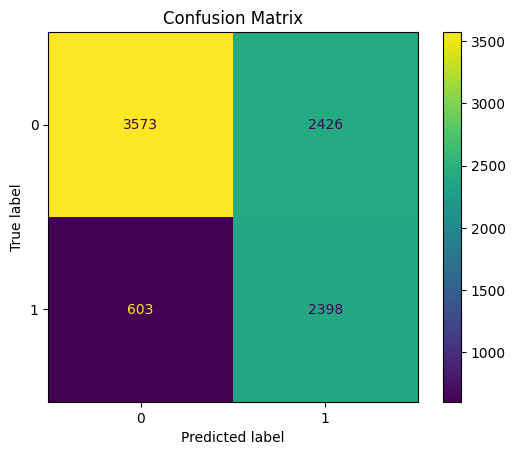

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create a ConfusionMatrixDisplay instance without specifying display_labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()


# deploy

In [ ]:
! pip install huggingface_hub


In [ ]:
!huggingface-cli login



    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
The token `HariniHari` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `HariniHari`


**pushing the model**

In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

model = DistilBertForSequenceClassification.from_pretrained('best_model')
tokenizer = DistilBertTokenizer.from_pretrained("best_model")

model.push_to_hub("dsHarini/distilbert-alignment-model")
tokenizer.push_to_hub("dsHarini/distilbert-alignment-model")

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/dsHarini/distilbert-alignment-model/commit/8118be02e71a81223ffa356bf29564de89398abf', commit_message='Upload tokenizer', commit_description='', oid='8118be02e71a81223ffa356bf29564de89398abf', pr_url=None, repo_url=RepoUrl('https://huggingface.co/dsHarini/distilbert-alignment-model', endpoint='https://huggingface.co', repo_type='model', repo_id='dsHarini/distilbert-alignment-model'), pr_revision=None, pr_num=None)

In [ ]:
! pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 115.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.1 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained('')
tokenizer = BertTokenizer.from_pretrained('')


def predict(text, reason):
    # Combine text and reason
    combined_input = text + " " + reason
    # Tokenize the combined input
    inputs = tokenizer(combined_input, return_tensors="pt", truncation=True, padding=True, max_length=512)
    # Get model predictions
    outputs = model(**inputs)
    logits = outputs.logits
    # Determine the predicted class
    predicted_class = torch.argmax(logits, dim=1).item()
    if predicted_class == 0:
        return 'The text is not aligned'
    elif predicted_class == 1:
        return 'The text is aligned'
    else:
        return 'Unexpected class prediction'

In [ ]:
import gradio as gr

# Create the Gradio interface
iface = gr.Interface(
    fn=predict,
    inputs=[
        gr.Textbox(lines=5, placeholder="Enter text here...", label="Text"),
        gr.Textbox(lines=5, placeholder="Enter reason here...", label="Reason")
    ],
    outputs="text",
    title="BERT Text Classifier",
    description="Enter text and reason to classify using the fine-tuned BERT model."
)
iface.launch()